In [1]:
# впишите нужные вам пакеты
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import datetime

### Задание 1 (1 балл)
Загрузить данные `diamonds.csv` в DataFrame  с именем `df`

In [2]:
df = pd.read_csv('diamonds.csv')
df = df.drop(columns='Unnamed: 0')
# display(df.info())
display(df)

,carat,cut,color,clarity,depth,table,price,length,width,height
0,0.33,Ideal,H,SI1,61.7,55.0,564,4.43,4.46,2.74
1,1.20,Ideal,I,VS2,62.1,57.0,5914,6.78,6.71,4.19
2,0.62,Ideal,D,VS1,61.0,57.0,2562,5.51,5.54,3.37
3,0.34,Good,H,VS2,63.1,56.0,537,4.41,4.46,2.80
4,1.20,Ideal,E,SI2,62.5,55.0,5964,6.77,6.84,4.25
...,...,...,...,...,...,...,...,...,...,...
19995,0.30,Very Good,D,VVS2,63.2,55.0,754,4.27,4.30,2.71
19996,0.40,Good,E,SI1,60.6,65.0,1110,4.74,4.71,2.86
19997,1.50,Premium,D,SI2,58.9,60.0,8518,7.48,7.45,4.40
19998,2.26,Very Good,H,SI2,63.3,59.0,13923,8.35,8.26,5.25


### Задание 2  (1 балл)
Проанализировав статистики по данным, найдите адреса физически невозможных строк:
1. Выведите их адреса **в виде списка**, а также **среза исходного  датафрейма** по данным строкам. 
2. Удалите данные стоки из DataFrame, результат пересохраните в DataFrame `df`,  **выведите размер (shape) обновленного `df`**. 

Прмечание: два балла дается за корректный и компактный код (без костылей), за работающий правильно код дается 1 балл. 

Статистики:

In [3]:
display(df.describe()) # видно что у length , width, height минимальные значения есть 0, такого быть не может
# df[df.length == 0]
# df[df.width == 0]
# df[df.height == 0]

,carat,depth,table,price,length,width,height
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.797013,61.754495,57.464930,3898.744500,5.733767,5.735586,3.539892
std,0.466379,1.426905,2.236297,3918.891022,1.109232,1.101417,0.687083
min,0.200000,52.200000,43.000000,327.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,956.000000,4.720000,4.730000,2.920000
50%,0.700000,61.900000,57.000000,2440.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5243.000000,6.540000,6.540000,4.030000
max,4.500000,79.000000,79.000000,18804.000000,10.230000,10.160000,6.720000


Адреса строк и срез:

In [4]:
# Делаем список по маске в столбце height == 0 , так как в ней содержатся нулевые значения из length и width, а также новые.
list1 = df[df.height == 0].index.to_list()
display(list1)

mask = df.index.isin(list1)
srez = df[mask]
display(srez)

[743, 1060, 3182, 3747, 12181, 18222]

,carat,cut,color,clarity,depth,table,price,length,width,height
743,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
1060,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
3182,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,0.0
3747,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.0
12181,2.20,Premium,H,SI1,61.2,59.0,17265,8.42,8.37,0.0
18222,1.56,Ideal,G,VS2,62.2,54.0,12800,0.00,0.00,0.0


Удаление строк и размер датафрейма:

In [5]:
df = df[~mask].reset_index(drop = True)
display(df)
df.shape

,carat,cut,color,clarity,depth,table,price,length,width,height
0,0.33,Ideal,H,SI1,61.7,55.0,564,4.43,4.46,2.74
1,1.20,Ideal,I,VS2,62.1,57.0,5914,6.78,6.71,4.19
2,0.62,Ideal,D,VS1,61.0,57.0,2562,5.51,5.54,3.37
3,0.34,Good,H,VS2,63.1,56.0,537,4.41,4.46,2.80
4,1.20,Ideal,E,SI2,62.5,55.0,5964,6.77,6.84,4.25
...,...,...,...,...,...,...,...,...,...,...
19989,0.30,Very Good,D,VVS2,63.2,55.0,754,4.27,4.30,2.71
19990,0.40,Good,E,SI1,60.6,65.0,1110,4.74,4.71,2.86
19991,1.50,Premium,D,SI2,58.9,60.0,8518,7.48,7.45,4.40
19992,2.26,Very Good,H,SI2,63.3,59.0,13923,8.35,8.26,5.25


(19994, 10)

### Задание 3  (1 балл)

Построить распредление (гистограмму) цены (`price`), в гистограмме устнановить **30 интервалов**.

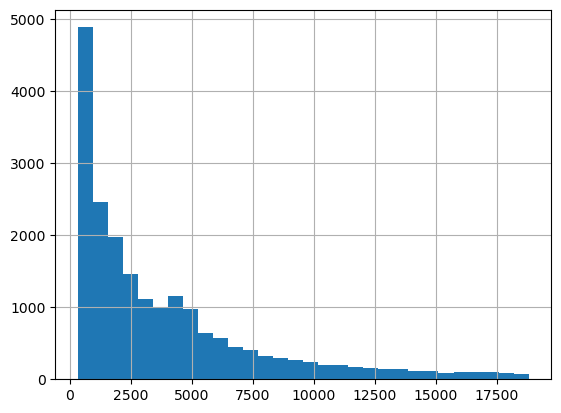

In [6]:
df.price.hist(bins =30);

### Задание 4 (2 балла)
Найти среднюю стоимость брильянта в зависимости от чистоты камня (`clarity`) от худшего к лучшему (**ответ в виде Series**).

Примечание 1: Чистота от худшего к лучшему `['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']`.

Примечание 2: 
- 2 балла дается за команду в одну строку, работающюю слева на право, без общих скобок/вложений; 
- 1 балл за правильный, работающий код; 
- 0 баллов - на выходе ошибка или неправильный объект.

In [7]:
chist = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
df.groupby('clarity')['price'].mean().reindex(chist)

clarity
I1      3806.791519
SI2     4948.347319
SI1     4010.302913
VS2     3892.918925
VS1     3802.706833
VVS2    3254.350581
VVS1    2530.888889
IF      2625.806748
Name: price, dtype: float64

### Задание 5  (1 балл)

Построить точечный график (scatter) зависимости цены (ось y) от каратов (от x). Установить прозрачность точек на 0.1 .

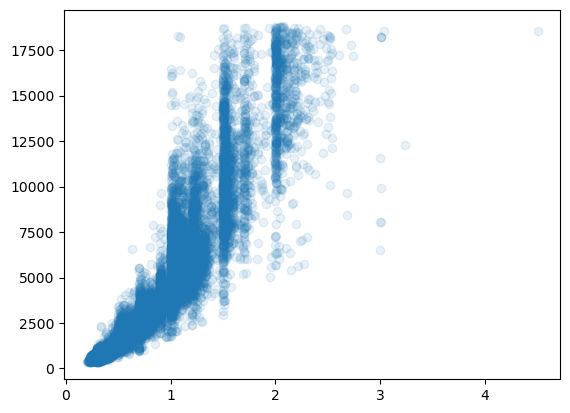

In [8]:
plt.scatter(x = df.carat, y = df.price, alpha = 0.1)

# Задание 6  (1 балл)

Срезать данные по каратам (carat) в диапазоне от 0.95 до 1.05 карата (включая границы). 

Найти среднею цену в зависимости от чистоты камня (`clarity`). Построить столбцовую диаграму по порядку  чистоты `['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']` в зависимости от средней цены `price`.

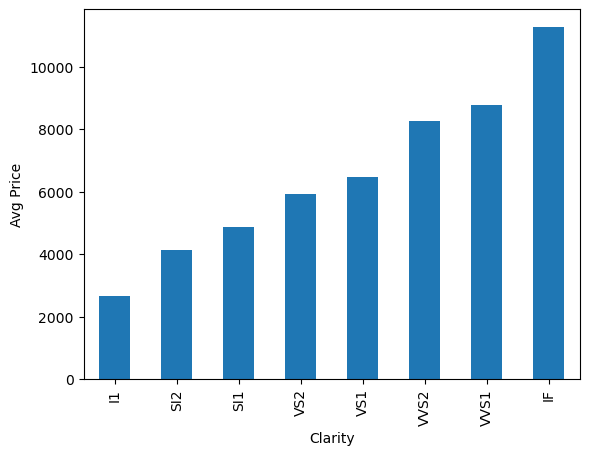

In [9]:
tabl = df[(df.carat >= 0.95) & (df.carat < 1.05)].groupby('clarity')['price'].mean()
tabl.loc[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']].plot(kind='bar', xlabel='Clarity', ylabel='Avg Price')
plt.show();

### Задание 7 (2 балла)
Построить сводную таблицу **по порядку рейтинга огранки (`cut` как индекс)** и **средней цены (`price`) и ее стандартного отклонения**. 

Рейтинг огранки `['Ideal','Premium', 'Very Good', 'Good','Fair']` (от лучшей к худшей).

Пример таблицы:

| <br>cut         |      mean    |  std  |
|----------|:-------------:|------:|
|  Ideal   | ... | ...  |
|  ...     | ... |  ... |
|    Fair  | ... |  ... |

Прмечание: два балла дается за корректный и компактный код (без костылей), за работающий правильно код дается 1 балл. 

In [10]:
rating_ogranki = ['Ideal','Premium', 'Very Good', 'Good','Fair']
df6 = df.groupby(by='cut').agg({'price':['mean','std']}).sort_values(by='cut').reindex(rating_ogranki).droplevel(level=0, axis=1)
df6

,mean,std
cut,,
Ideal,3457.838795,3755.580635
Premium,4545.885062,4337.413496
Very Good,3916.678936,3830.280870
Good,3861.578778,3533.330533
Fair,4168.688226,3171.546995


### Задание 8  (1 балл)
Построить график boxplot зависимости цены (ось y) от огранки `['Ideal','Premium', 'Very Good', 'Good','Fair']` (от лучшей к худшей). Для камней стоимости от 10000$ и размере более 1.5 карат (граница стоимости и размера включена)

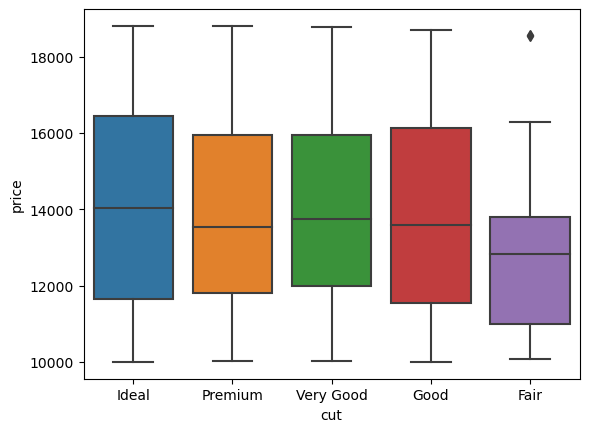

In [11]:
df8 = df[(df['price'] >=10000)&(df['carat']>=1.5)].sort_values(by='price', ascending=False)
sns.boxplot(data=df8, x="cut", y="price");